In [1]:
from PIL import Image
import numpy as np
import sys
import cv2
sys.path.append('../../scripts')
sys.path.append("../../DISF/python3/")
from disf import DISF_Superpixels
from utils import *
from superpixel_treatment import *

## Visualizing the overlapping between the ground truth and the pre segmentation for image 5

In [2]:
def obtain_superpixel_filtered_img(original, label_img):
    superpixel_ids = np.unique(label_img)
    superpixel_ids = superpixel_ids[1:] # Excluding the first empty superpixel

    segmented_superpixels = []
    segmented_superpixels_ids = []


    for superpixel_id in superpixel_ids:
        superpixel_img = get_superpixel_img(label_img, superpixel_id)
        cropped_original_img,cropped_superpixel_img = get_cropped_superpixel_img(original, superpixel_img)
        segmented = apply_mask(cropped_original_img, cropped_superpixel_img)
        segmented_superpixels.append(segmented)
        segmented_superpixels_ids.append(superpixel_id)

    filtered_ids, filtered_superpixels = filter_superpixels_by_color_mean(segmented_superpixels_ids, segmented_superpixels)
    return get_reconstructed_image(label_img, filtered_ids)

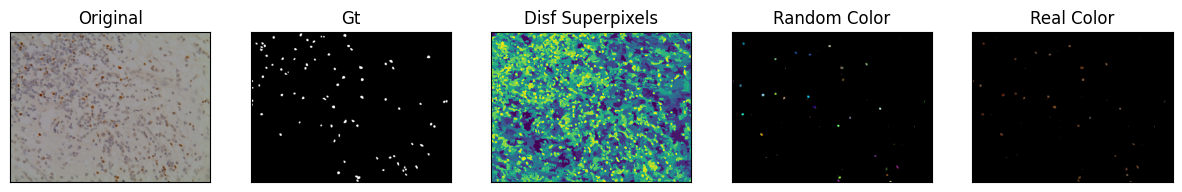

In [3]:
image_number = 6
original = np.array(Image.open(f'../../data/cells_dataset/original/{image_number}.png'))
gt = np.array(Image.open(f'../../data/cells_dataset/labels/{image_number}.png'))
superpixel_label_img, border_img = DISF_Superpixels(original, 7000, 4000)
random_color = np.array(Image.open(f'../../data/pre_segmentationsSilvio/img{image_number}_label_random_color.png'))
real_color = np.array(Image.open(f'../../data/pre_segmentationsSilvio/img{image_number}_label_real_color.png'))

random_color = cv2.cvtColor(random_color, cv2.COLOR_RGBA2RGB)
real_color = cv2.cvtColor(real_color, cv2.COLOR_RGBA2RGB)
visualize(
    original = original,
    gt = gt,
    DISF_Superpixels = superpixel_label_img, 
    random_color = random_color,
    real_color = real_color
)

Obtaining DISF segmentation's filtered image.

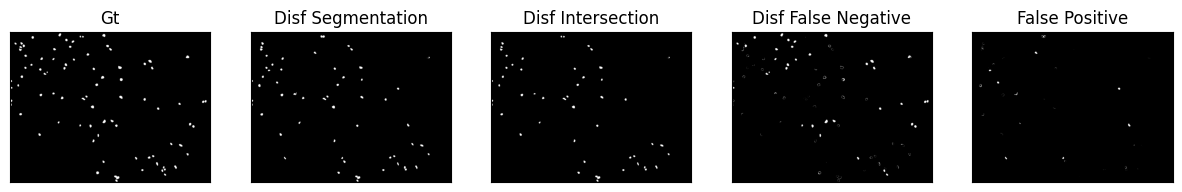

In [4]:
filtered_img = cv2.cvtColor(np.uint8(obtain_superpixel_filtered_img(original, superpixel_label_img)), cv2.COLOR_GRAY2RGB)
disf_intersection = cv2.bitwise_and(gt, filtered_img)
disf_intersection[disf_intersection != 0] = 255
disf_false_negative = cv2.bitwise_xor(gt, disf_intersection)
disf_false_positive = false_positive = cv2.bitwise_xor(filtered_img, disf_intersection)
visualize(gt = gt, DISF_Segmentation = filtered_img, disf_intersection = disf_intersection, disf_false_negative = disf_false_negative, false_positive = disf_false_positive)

Visualizing pre segmentation overlapping

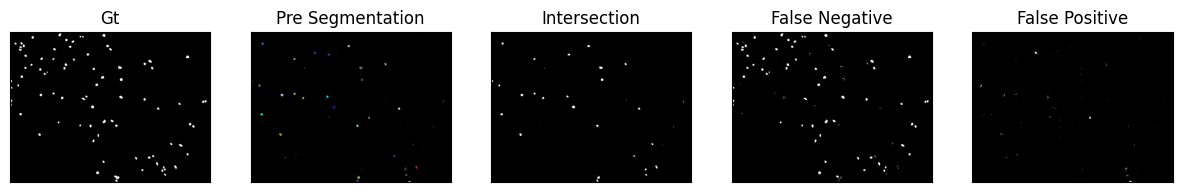

In [5]:
intersection = cv2.bitwise_and(gt, random_color)
white_random_color = random_color.copy()
white_random_color[white_random_color!=0] = 255
intersection[intersection != 0] = 255
false_negative = cv2.bitwise_xor(gt, intersection)
false_positive = cv2.bitwise_xor(white_random_color, intersection)
visualize(gt = gt,pre_segmentation = random_color, Intersection = intersection, false_negative = false_negative, false_positive = false_positive)

Comparing both pre-segmentations

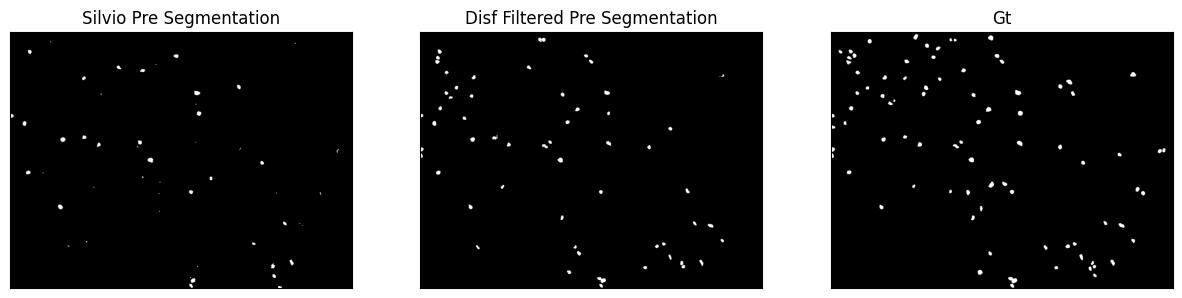

In [6]:

visualize(silvio_pre_segmentation = white_random_color, DISF_filtered_pre_segmentation =  filtered_img, gt= gt)

Visualizing True Positives

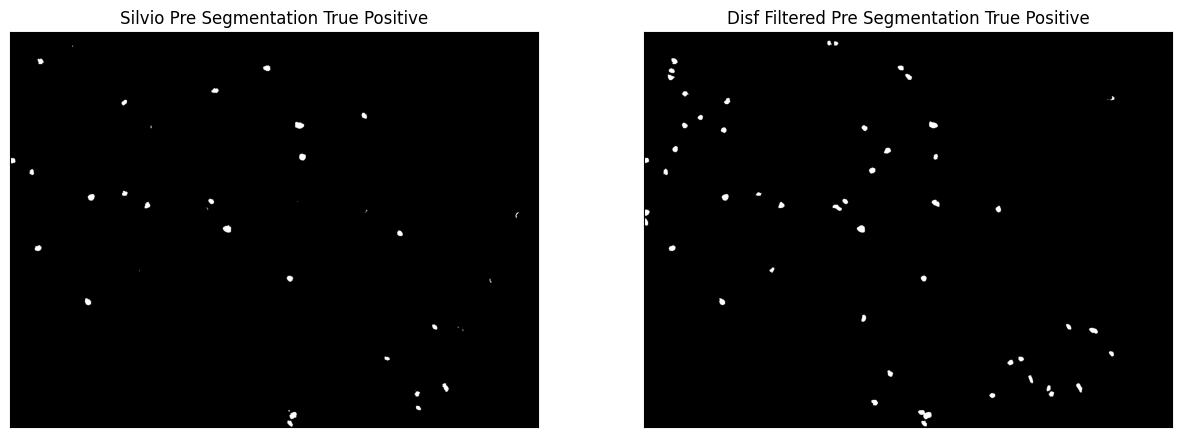

In [7]:
visualize(silvio_pre_segmentation_true_positive= intersection, DISF_filtered_pre_segmentation_true_positive=disf_intersection)

Visualizing False Positives

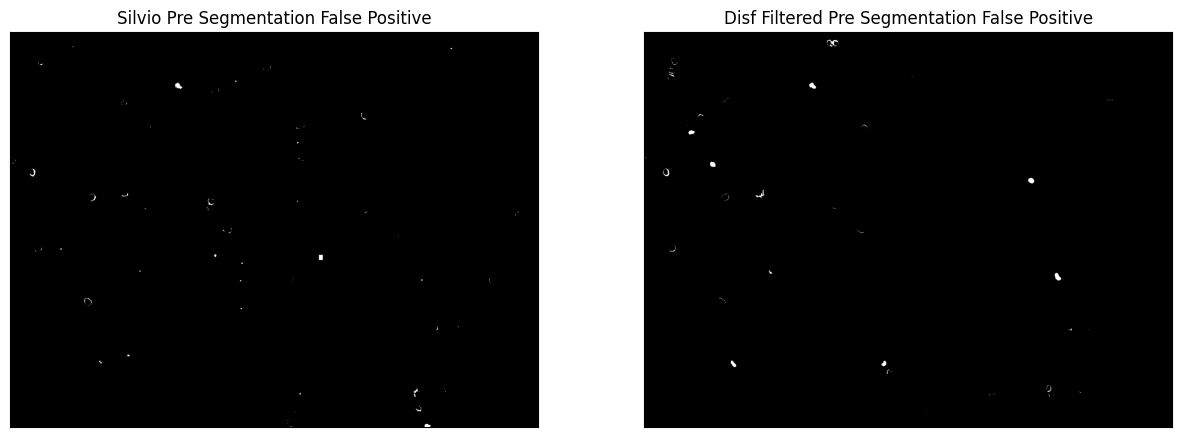

In [8]:
visualize(silvio_pre_segmentation_false_positive= false_positive, DISF_filtered_pre_segmentation_false_positive=disf_false_positive)

Visualizing False Negative

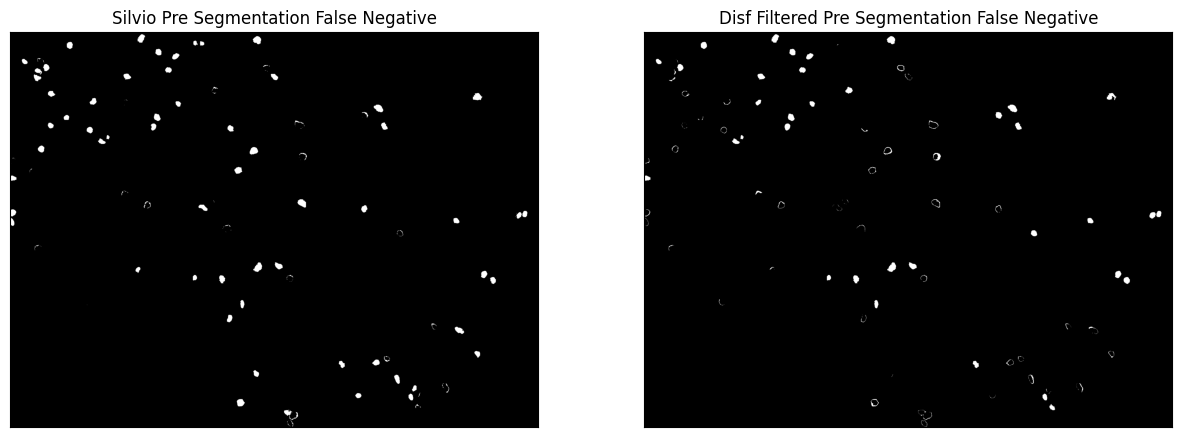

In [9]:
visualize(silvio_pre_segmentation_false_negative= false_negative, DISF_filtered_pre_segmentation_false_negative =  disf_false_negative)